In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

file_path = 'riket2023_åk9_np.xlsx'
df_math = pd.read_excel(file_path, sheet_name='Matematik', skiprows=8)
df_swedish = pd.read_excel(file_path, sheet_name='Svenska', skiprows=8)
df_english = pd.read_excel(file_path, sheet_name='Engelska', skiprows=8)
df_ssas = pd.read_excel(file_path, sheet_name='Svenska som andraspråk', skiprows=8)


columns_to_rename_swedish = {df_swedish.columns[1]: "huvudman",df_swedish.columns[2]: "Totalt (A-F)" , df_swedish.columns[3]: "Flickor (A-F)" , df_swedish.columns[4]: "Pojkar (A-F)" , df_swedish.columns[5]: "Totalt (A-E)" , df_swedish.columns[6]: "Flickor (A-E)" , df_swedish.columns[7]: "Pojkar (A-E)", df_swedish.columns[8]: "Totalt (Poäng)" , df_swedish.columns[9]: "Flickor (Poäng)" , df_swedish.columns[10]: "Pojkar (Poäng)"}
columns_to_rename_english = {df_english.columns[1]: "huvudman",df_english.columns[2]: "Totalt (A-F)" , df_english.columns[3]: "Flickor (A-F)" , df_english.columns[4]: "Pojkar (A-F)" , df_english.columns[5]: "Totalt (A-E)" , df_english.columns[6]: "Flickor (A-E)" , df_english.columns[7]: "Pojkar (A-E)", df_english.columns[8]: "Totalt (Poäng)" , df_english.columns[9]: "Flickor (Poäng)" , df_english.columns[10]: "Pojkar (Poäng)"}
columns_to_rename_ssas = {
    df_ssas.columns[1]: "huvudman",
    df_ssas.columns[2]: "Totalt (A-F)",
    df_ssas.columns[3]: "Flickor (A-F)",
    df_ssas.columns[4]: "Pojkar (A-F)",
    df_ssas.columns[5]: "Totalt (A-E)",
    df_ssas.columns[6]: "Flickor (A-E)",
    df_ssas.columns[7]: "Pojkar (A-E)",
    df_ssas.columns[8]: "Totalt (Poäng)",
    df_ssas.columns[9]: "Flickor (Poäng)",
    df_ssas.columns[10]: "Pojkar (Poäng)"
}

df_ssas = df_ssas.rename(columns=columns_to_rename_ssas)
df_swedish = df_swedish.rename(columns= columns_to_rename_swedish)
df_english = df_english.rename(columns= columns_to_rename_english)

df_swedish

,Riket,huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


In [38]:
import pandas as pd



columns_to_rename = {
    df_math.columns[1]: "huvudman",
    df_math.columns[2]: "Totalt (A-F)",
    df_math.columns[3]: "Flickor (A-F)",
    df_math.columns[4]: "Pojkar (A-F)",
    df_math.columns[5]: "Totalt (A-E)",
    df_math.columns[6]: "Flickor (A-E)",
    df_math.columns[7]: "Pojkar (A-E)",
    df_math.columns[8]: "Totalt (Poäng)",
    df_math.columns[9]: "Flickor (Poäng)",
    df_math.columns[10]: "Pojkar (Poäng)"
}

df_math = df_math.rename(columns=columns_to_rename)

df = pd.DataFrame(df_math)

df['Girls Failed Percentage'] = 100 - pd.to_numeric(df['Flickor (A-E)'].replace('~100', '100'))
df['Boys Failed Percentage'] = 100 - pd.to_numeric(df['Pojkar (A-E)'].replace('~100', '100'))

df['Number of Girls Failed'] = round((df['Girls Failed Percentage']) * df["Flickor (A-F)"])
df['Number of Boys Failed'] = round((df['Boys Failed Percentage']) * df["Pojkar (A-F)"])
df['Total Number of Failed Students'] = df['Number of Girls Failed'] + round(df['Number of Boys Failed'])


print(df[['huvudman','Total Number of Failed Students','Number of Girls Failed', 'Number of Boys Failed']])





     huvudman  Total Number of Failed Students  Number of Girls Failed  \
0    Samtliga                        1162281.0                582492.0   
1    Kommunal                        1000184.0                496748.0   
2     Enskild                         161073.0                 86869.0   
3  Skolverket                              0.0                     0.0   

   Number of Boys Failed  
0               579789.0  
1               503436.0  
2                74204.0  
3                    0.0  


In [39]:
df_swedish

,Riket,huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


In [40]:
df_english

,Riket,huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


   Math  Swedish  English  SSAS
0  11.9     13.6     15.7   9.4
1  11.6     13.3     15.4     9
2  13.0     14.4     16.9  11.1
3  14.1     15.0     18.5    ..


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23148\695933286.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_points.replace('..',0, inplace=True)


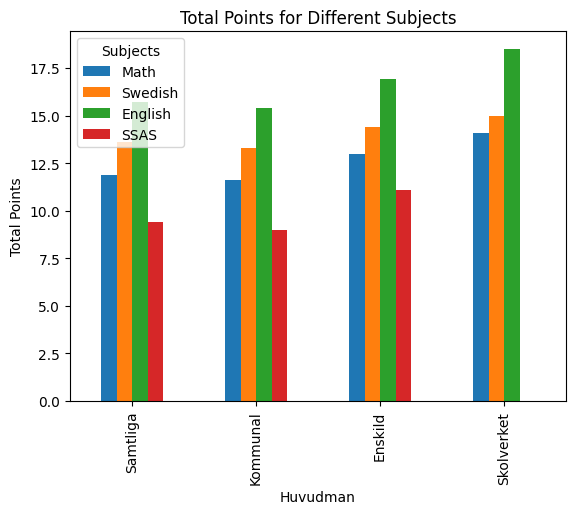

In [41]:
import pandas as pd
import matplotlib.pyplot as plt



# Concatenate Totalt (Poäng) columns from multiple DataFrames
subject_points = pd.concat([df_math['Totalt (Poäng)'], df_swedish['Totalt (Poäng)'], df_english['Totalt (Poäng)'], df_ssas['Totalt (Poäng)']], axis=1, keys=['Math', 'Swedish', 'English', 'SSAS'])
print(subject_points)
#didn't work ( works now forgot to commit it)
subject_points.replace('..',0, inplace=True)


subject_points.fillna(subject_points.mean(), inplace=True)


huvudman_labels = df_swedish['huvudman']


subject_points.plot.bar()
x_labels = huvudman_labels.reindex(subject_points.index) 
plt.xticks(range(len(x_labels)), x_labels)

plt.xlabel('Huvudman')
plt.ylabel('Total Points')
plt.title('Total Points for Different Subjects')
plt.legend(title='Subjects')

plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23148\477385158.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ssas.replace('..',0, inplace=True)


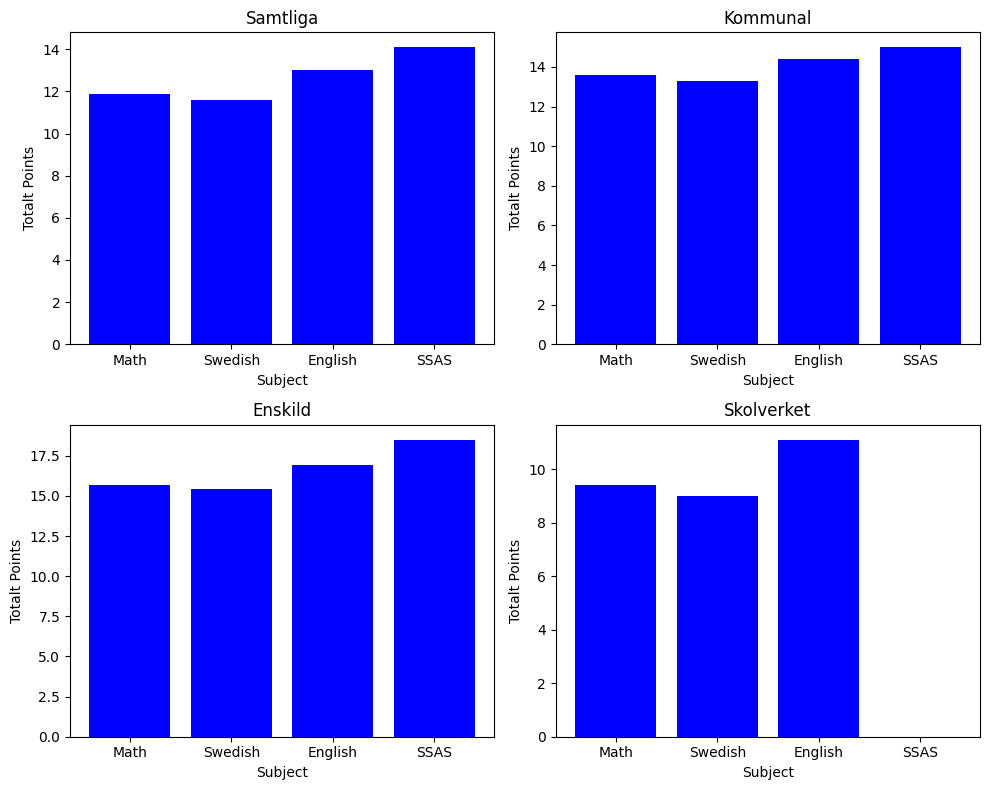

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of huvudman categories
huvudman_categories = ['Samtliga', 'Kommunal', 'Enskild', 'Skolverket']
Subjects = ['Math' , 'Swedish' , 'English' , 'SSAS']
df_ssas.replace('..',0, inplace=True)
df_ssas.replace('~100',100, inplace=True)

dataframes = [df_math, df_swedish, df_english, df_ssas]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, (df, category) in enumerate(zip(dataframes, huvudman_categories)):
    
    totalt_points = df['Totalt (Poäng)']

    ax = axes[i // 2, i % 2]
    
    x_values = range(len(Subjects))
    ax.bar(x_values, totalt_points, color='blue')
    ax.set_xticks(x_values)
    ax.set_xticklabels(Subjects)
    
    ax.set_title(f'{category}')
    ax.set_xlabel('Subject')
    ax.set_ylabel('Totalt Points')


plt.tight_layout()
plt.show()
